In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 250903


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test_202509/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/oryza_sativa_random_gene_list.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_hit_species_togoid_convert.tsv")

In [4]:
# Parameters
foldseek_result_tsv = "/tmp/k3mualn6/stg2e0e1f97-defd-4f2d-810e-ace647042029/foldseek_os_100genes_9606.tsv"
query_uniprot_idmapping_tsv = "/tmp/k3mualn6/stg56078dcf-4a50-49ae-9110-4cc9928c038e/os_100_genes_idmapping_all.tsv"
water_result_dir_path = "/tmp/k3mualn6/stg5ffab04f-c723-4a2a-a0af-c32e7c868a6c/result_water"
needle_result_dir_path = "/tmp/k3mualn6/stg4e2ebc9f-9b2e-4214-9447-cea2557c3df4/result_needle"
query_gene_list_tsv_path = "/tmp/k3mualn6/stgf3840127-91be-460f-b325-b2de61939a5b/oryza_sativa_random_100genes_list.tsv"
togoid_convert_tsv_path = "/tmp/k3mualn6/stg040bc208-14f0-421d-a355-e168cea76867/foldseek_hit_species_togoid_convert.tsv"


In [5]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
).with_columns(
    (pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession")), # "?" means non-greedy
    (pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit"))
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str
"""Os08g0530000""","""Q6ZIA3""","""Q9NWZ5""",7.7810e-58,1.0,8,39.3,0.393,210,6,491,491,1,533,548,534,0.99,0.973,0.8698,0.432,0.3883,0.3883,30.45,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ESAVGPHFSGLRLDSRRLSSSSLPTSPSAA…","""MAAPPARADADPSPTSPPTARDTPGRQAEK…",275,"""0.344,0.594,0.625,0.781,0.875,…"
"""Os08g0530000""","""Q6ZIA3""","""Q9BZX2""",9.1270e-27,1.0,5,55.5,0.555,120,68,273,491,17,231,261,216,0.42,0.824,0.8903,0.4096,0.7641,0.7641,1.422,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SKQPFVIGVSGGTASGKTTVCDMIIQQLH-…","""GGEPFLIGVSGGTASGKSSVCAKIVQLLGQ…",85,"""0.439,0.625,0.801,0.838,0.877,…"
"""Os08g0530000""","""Q6ZIA3""","""Q9HA47""",1.1610e-27,1.0,6,47.9,0.479,116,47,279,491,2,237,277,242,0.475,0.852,0.8673,0.4169,0.7319,0.7319,6.37,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""AAVNGFAPPPPPSAAAAAEEGSKQPFVIGV…","""ASAGGEDCESPAPEA---DRPHQRPFLIGV…",111,"""0.438,0.556,0.625,0.778,0.861,…"
"""Os08g0530000""","""Q6ZIA3""","""Q96BW1""",1.1220e-24,1.0,3,43.2,0.432,96,272,491,491,97,309,309,222,0.448,0.689,0.8436,0.4132,0.6478,0.6478,2.157,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""LGQHDLCKIY-PNVYVVNTTFQIRGMHTLI…","""LEDCELSRQIGAQLKLLPMNDQIRELQTII…",115,"""0.110,0.289,0.323,0.433,0.493,…"
"""Os08g0530000""","""Q6ZIA3""","""Q9Y6K8""",0.000067,0.99,32,12.8,0.128,67,4,463,491,61,461,562,523,0.937,0.714,0.3994,0.2345,0.2082,0.2082,30.77,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""AMESAVGPHFSGLRLDSRRLSSSSLPTSPS…","""SQEKKTLPPLNGGQ--SRR---SFLRNVMP…",271,"""0.321,0.469,0.562,0.562,0.625,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os04g0560100""","""A0A0P0WDT6""","""O75881""",4.1720e-13,1.0,29,12.5,0.125,69,8,520,545,22,506,506,548,0.941,0.958,0.5209,0.6458,0.6888,0.6888,6.092,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VVVAAVAAYMAWFWRM---SRGLSGPRV--…","""LALAAALLLLALCLLVRRTRRPGEPPLIKG…",381,"""0.562,0.588,0.611,0.667,0.598,…"
"""Os04g0560100""","""A0A0P0WDT6""","""Q9UNU6""",3.4560e-13,1.0,31,13.7,0.137,77,6,520,545,4,499,501,560,0.945,0.99,0.5165,0.6253,0.6753,0.6753,7.698,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""WAVVVAAVAAYMAWFWRMSRGLSGPRVW--…","""WGPVLGALLVVIAGYLCLPGMLRQRRPWEP…",374,"""0.643,0.667,0.688,0.706,0.722,…"
"""Os04g0560100""","""A0A0P0WDT6""","""P22680""",9.2800e-13,1.0,32,13.5,0.135,77,1,519,545,1,502,504,569,0.952,0.996,0.5378,0.6301,0.6754,0.6754,6.743,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MEAGTWAVVVAAVAAYMAWFWRMSRGLSGP…","""MMTTSLIWGIAIAACCCLWL---ILGIRRR…",375,"""0.556,0.600,0.977,0.938,0.865,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

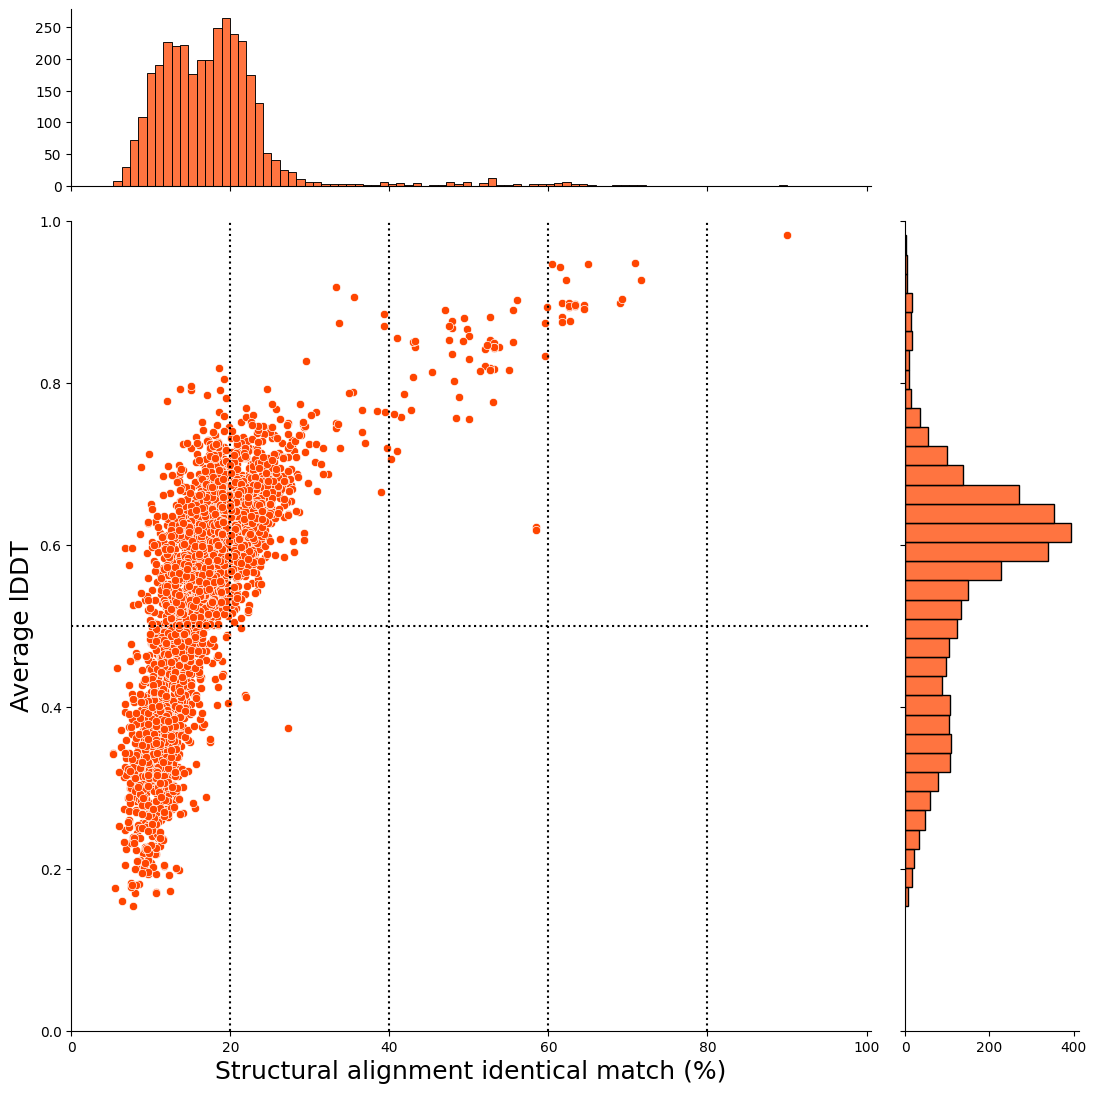

In [6]:
foldseek_filter_viz = foldseek_result.to_pandas()
sns.jointplot(
    data=foldseek_filter_viz,
    x="pident", # structural alignment identical match from foldseek result
    y="lddt",
    color="orangered",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Structural alignment identical match (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [7]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [8]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0N7KC66""","""Q96PX6""",496,"""94/496""",19.0,"""163/496""",32.9,"""148/496""",29.8,71.5
"""A0A0N7KFI2""","""O76031""",573,"""220/573""",38.4,"""301/573""",52.5,"""152/573""",26.5,922.5
"""A0A0N7KFI2""","""Q5HY92""",147,"""37/147""",25.2,"""63/147""",42.9,"""29/147""",19.7,96.5
"""A0A0N7KFI2""","""Q6PIW4""",415,"""81/415""",19.5,"""142/415""",34.2,"""143/415""",34.5,138.0
"""A0A0N7KQM5""","""O00187""",104,"""26/104""",25.0,"""38/104""",36.5,"""39/104""",37.5,48.0
…,…,…,…,…,…,…,…,…,…
"""Q9LGI2""","""Q99877""",141,"""84/141""",59.6,"""106/141""",75.2,"""18/141""",12.8,413.5
"""Q9LGI2""","""Q99879""",141,"""83/141""",58.9,"""104/141""",73.8,"""18/141""",12.8,409.5
"""Q9LGI2""","""Q99880""",129,"""80/129""",62.0,"""100/129""",77.5,"""6/129""",4.7,405.5


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0N7KC66""","""Q96PX6""",627,"""106/627""",16.9,"""180/627""",28.7,"""237/627""",37.8,63.5
"""A0A0N7KFI2""","""O76031""",806,"""231/806""",28.7,"""321/806""",39.8,"""334/806""",41.4,917.5
"""A0A0N7KFI2""","""Q5HY92""",983,"""115/983""",11.7,"""197/983""",20.0,"""562/983""",57.2,60.5
"""A0A0N7KFI2""","""Q6PIW4""",880,"""125/880""",14.2,"""208/880""",23.6,"""441/880""",50.1,123.5
"""A0A0N7KQM5""","""O00187""",801,"""47/801""",5.9,"""61/801""",7.6,"""685/801""",85.5,22.0
…,…,…,…,…,…,…,…,…,…
"""Q9LGI2""","""Q99877""",154,"""84/154""",54.5,"""106/154""",68.8,"""29/154""",18.8,411.5
"""Q9LGI2""","""Q99879""",154,"""83/154""",53.9,"""104/154""",67.5,"""29/154""",18.8,407.5
"""Q9LGI2""","""Q99880""",154,"""80/154""",51.9,"""100/154""",64.9,"""29/154""",18.8,403.5


In [9]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A0N7KC66""","""Q96PX6""",496,627,"""94/496""","""106/627""",19.0,16.9,32.9,28.7,"""148/496""","""237/627""",29.8,37.8,71.5,63.5
"""A0A0N7KFI2""","""O76031""",573,806,"""220/573""","""231/806""",38.4,28.7,52.5,39.8,"""152/573""","""334/806""",26.5,41.4,922.5,917.5
"""A0A0N7KFI2""","""Q5HY92""",147,983,"""37/147""","""115/983""",25.2,11.7,42.9,20.0,"""29/147""","""562/983""",19.7,57.2,96.5,60.5
"""A0A0N7KFI2""","""Q6PIW4""",415,880,"""81/415""","""125/880""",19.5,14.2,34.2,23.6,"""143/415""","""441/880""",34.5,50.1,138.0,123.5
"""A0A0N7KQM5""","""O00187""",104,801,"""26/104""","""47/801""",25.0,5.9,36.5,7.6,"""39/104""","""685/801""",37.5,85.5,48.0,22.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Q9LGI2""","""Q99877""",141,154,"""84/141""","""84/154""",59.6,54.5,75.2,68.8,"""18/141""","""29/154""",12.8,18.8,413.5,411.5
"""Q9LGI2""","""Q99879""",141,154,"""83/141""","""83/154""",58.9,53.9,73.8,67.5,"""18/141""","""29/154""",12.8,18.8,409.5,407.5
"""Q9LGI2""","""Q99880""",129,154,"""80/129""","""80/154""",62.0,51.9,77.5,64.9,"""6/129""","""29/154""",4.7,18.8,405.5,403.5


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [10]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (3_371, 44)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ A0A0P0VCB7  ┆ P55884     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ B7FAC9      ┆ O75676     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q75J49      ┆ Q13470     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q75J49      ┆ Q8NE28     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1         

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os01g0924300""","""A0A0P0VCB7""","""P55884""",0.0004645,1.0,15,10.8,0.108,21,4,165,178,517,695,814,193,0.91,0.22,0.5025,0.5772,0.1516,0.1516,6.049,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VAWSRQSPEVLLSGSFDK---------SVA…","""LHWQKN-GDYLCVKVDRTPKGTQGVVTNFE…",127,"""0.541,0.610,0.722,0.711,0.700,…",56,856,"""17/56""","""41/856""",30.4,4.8,48.2,7.7,"""14/56""","""720/856""",25.0,84.1,53.0,39.5
"""Os01g0810800""","""B7FAC9""","""O75676""",9.8310e-11,1.0,19,15.6,0.156,67,569,933,937,370,766,772,428,0.39,0.514,0.5373,0.2378,0.2832,0.2832,20.8,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""KGKSRKSEEEDYDMYEEETPLHIDIRRFTY…","""HNNAVMTDGLEAPGA---------GDRPGR…",267,"""0.167,0.475,0.432,0.639,0.667,…",256,1377,"""68/256""","""95/1377""",26.6,6.9,44.1,11.8,"""40/256""","""1045/1377""",15.6,75.9,167.0,131.0
"""Os03g0638800""","""Q75J49""","""Q13470""",3.1790e-18,1.0,14,23.2,0.232,81,35,351,379,65,378,666,349,0.836,0.471,0.6515,0.5964,0.3491,0.3491,8.535,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""DLT---SLDIQLEKQLTKTWGK-------A…","""RLRSGPKSKNWVYKILGGFAPEHKEPTLPS…",201,"""0.211,0.100,0.152,0.333,0.225,…",312,735,"""86/312""","""106/735""",27.6,14.4,42.9,22.9,"""79/312""","""425/735""",25.3,57.8,255.0,236.0
"""Os03g0638800""","""Q75J49""","""Q8NE28""",2.7440e-13,1.0,15,14.8,0.148,50,49,349,379,11,294,680,336,0.794,0.418,0.5487,0.4871,0.2849,0.2849,9.226,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""KTWGKANLKAHGPKEDWEIDLAKLEIRYVI…","""PTQGERGPGS--PGEP----MEKYQVLYQL…",199,"""0.214,0.250,0.389,0.324,0.412,…",354,787,"""74/354""","""75/787""",20.9,9.5,38.7,17.8,"""94/354""","""515/787""",26.6,65.4,135.0,119.5
"""Os09g0554000""","""Q0IZR6""","""P55916""",0.002747,1.0,3,21.1,0.211,37,25,181,182,2,176,312,175,0.863,0.561,0.607,0.636,0.3954,0.3954,5.422,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""TGGMRLFSPEYYALCTGGGMLAAGATHLAI…","""VGLKPSDVPPTMAVKFLGAGTAACFADLVT…",120,"""0.250,0.353,0.250,0.196,0.281,…",155,325,"""39/155""","""44/325""",25.2,13.5,38.1,21.2,"""24/155""","""156/325""",15.5,48.0,119.5,104.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Create Scatter Plot for all hits (x-axis: Similarity_percent_needle) Global alignment

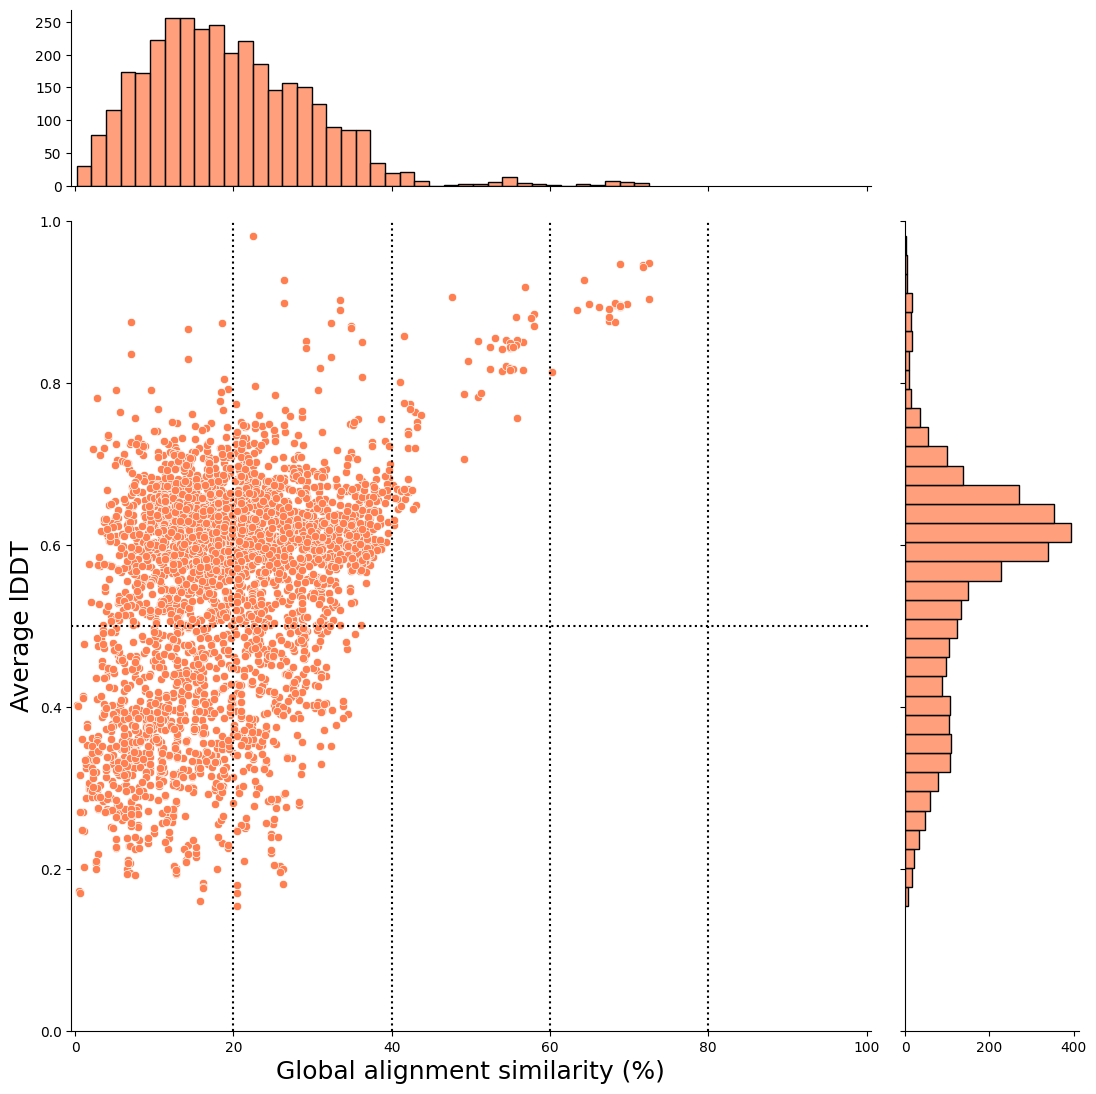

In [11]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;


## Create Scatter Plot for all hits (x-axis: Similarity_percent_water) Local Alignment

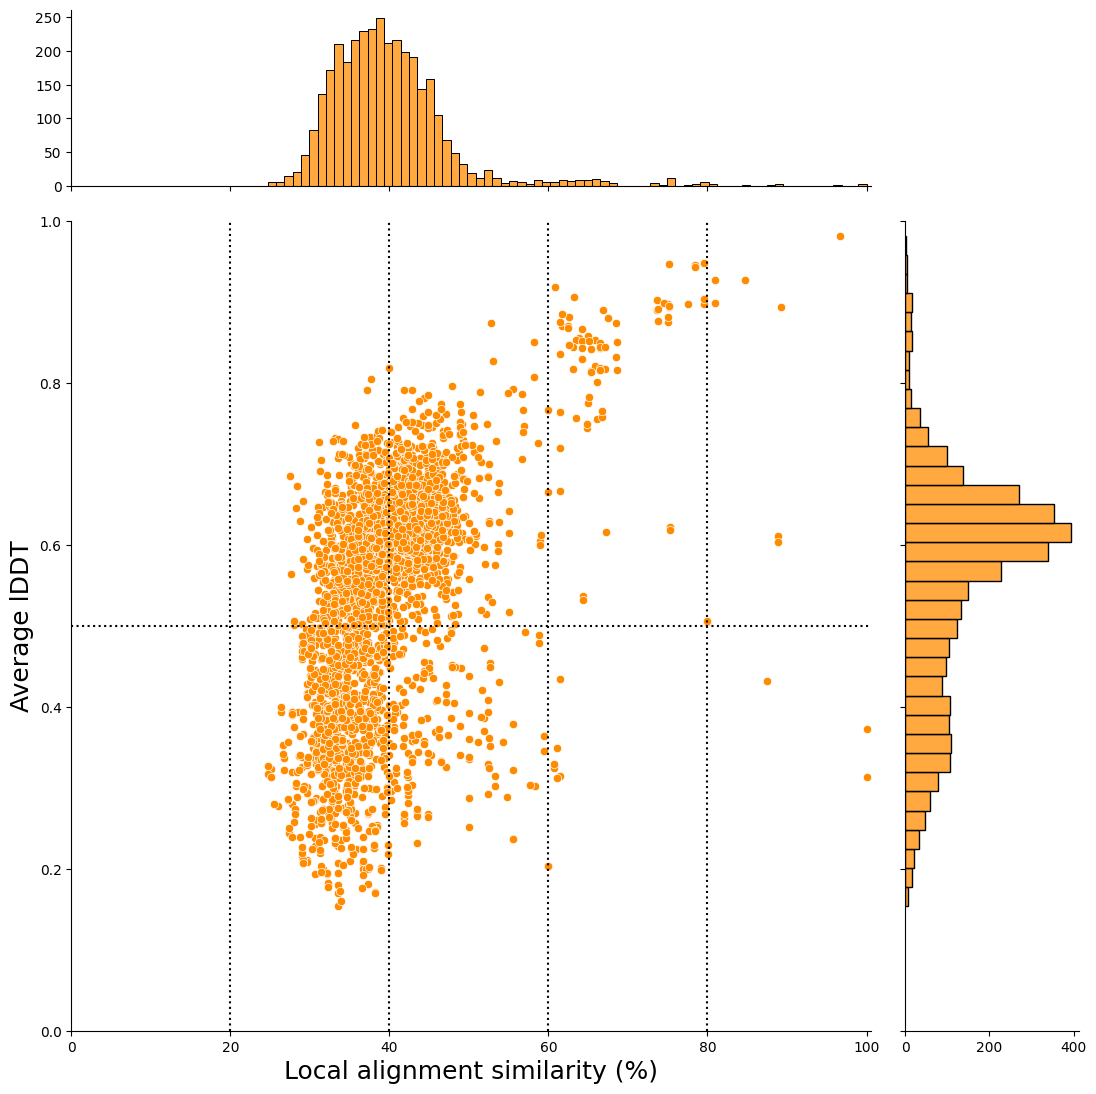

In [12]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_water", # local alignment similarity
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Counting foldseek hits in Gene level

In [13]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""Os03g0638800""",713,false
"""Os01g0924300""",471,false
"""Os09g0249000""",302,false
"""Os01g0810800""",196,false
"""Os02g0249600""",188,false
…,…,…
"""Os03g0852400""",0,true
"""Os08g0547350""",0,true
"""Os12g0566200""",0,true


&nbsp;

&nbsp;

&nbsp;

# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- Select the ones that have foldseek hit

In [14]:
condition1 = join_foldseek.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).sort(
        by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession
        descending=[False, False, False]
    )

condition1_rm = condition1.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition1.group_by(["From"], maintain_order=True).n_unique())
display(condition1)

shape: (44, 44)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Os01g01048 ┆ 3          ┆ 4         ┆ 6      ┆ … ┆ 4         ┆ 5         ┆ 4         ┆ 5         │
│ 00         ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Os01g01523 ┆ 1          ┆ 31        ┆ 25     ┆ … ┆ 16        ┆ 16        

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os01g0104800""","""A0A0N7KC66""","""Q96PX6""",0.005211,0.164,21,13.7,0.137,78,1,464,464,21,508,553,567,1.0,0.882,0.5694,0.07142,0.06222,0.06222,65.27,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ASNHQVKVPDGEHSFETYVKMKEEFAVLSR…","""APAGSSAAPPAPVEDLSKVS-DEELLQWSK…",307,"""1.000,0.708,0.917,0.969,0.906,…",496,627,"""94/496""","""106/627""",19.0,16.9,32.9,28.7,"""148/496""","""237/627""",29.8,37.8,71.5,63.5
"""Os01g0104800""","""Q657Z6""","""Q96PX6""",0.03961,0.106,20,11.5,0.115,78,48,645,645,2,508,553,675,0.927,0.917,0.5543,0.07118,0.08041,0.08041,55.06,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MESEDDLEHPVFDLEGISENETDDSEGDED…","""SKAAGGAAAAAAAAESCSPAPAGSSAAPPA…",352,"""0.325,0.475,0.450,0.575,0.625,…",496,768,"""94/496""","""111/768""",19.0,14.5,32.9,25.0,"""148/496""","""338/768""",29.8,44.0,71.5,56.5
"""Os01g0104800""","""Q658C6""","""Q96PX6""",0.03851,0.069,20,14.4,0.144,85,169,645,645,1,508,553,587,0.74,0.919,0.5557,0.05079,0.05847,0.05847,68.1,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""EDGESDEEDRAIKASNHQVKVPDGE-----…","""MSKAAGGAAAAAAAAESCSPAPAGSSAAPP…",313,"""0.229,0.346,0.396,0.667,0.722,…",496,768,"""94/496""","""111/768""",19.0,14.5,32.9,25.0,"""148/496""","""338/768""",29.8,44.0,71.5,56.5
"""Os01g0104800""","""Q657Z6""","""Q9H4M7""",0.009003,0.15,22,12.1,0.121,79,1,546,645,236,778,779,652,0.847,0.697,0.5249,0.07949,0.06875,0.06875,49.18,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MGKEKGKGKWKRP---PTVKPPVMAASASD…","""LSRPPSPLSLPRPRSAPARRPPAPSGDTAP…",358,"""1.000,1.000,0.929,0.964,0.917,…",278,1259,"""57/278""","""49/1259""",20.5,3.9,34.5,6.5,"""83/278""","""1094/1259""",29.9,86.9,53.5,34.5
"""Os01g0104800""","""Q657Z6""","""Q9NQZ2""",2.6380e-8,1.0,20,19.5,0.195,133,11,644,645,19,479,479,680,0.983,0.962,0.6203,0.1463,0.1934,0.1934,41.93,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""KRPPTVK---------PPVMAASASDDDEI…","""KAGPTLTDENGDDLGLPPSPGDTSYYQDQV…",282,"""0.406,0.525,0.688,0.667,0.525,…",682,688,"""153/682""","""153/688""",22.4,22.2,37.2,36.9,"""248/682""","""252/688""",36.4,36.6,412.5,411.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q2QT07""","""Q9H222""",7.2430e-36,1.0,20,25.8,0.258,174,59,700,713,1,648,651,674,0.9,0.995,0.7678,0.7694,0.8401,0.8401,8.228,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VDDRWAPSAGGGVGTFDGVEVPLPAAQAVS…","""MGDLSSLTPGGSM----GLQVNRGSQSSLE…",442,"""0.350,0.417,0.550,0.722,0.778,…",682,762,"""187/682""","""188/762""",27.4,24.7,46.5,42.3,"""92/682""","""160/762""",13.5,21.0,608.0,604.0
"""Os12g0411700""","""Q0INQ2""","""Q9UNQ0""",7.3050e-39,1.0,19,29.1,0.291,191,73,692,713,2,646,655,656,0.87,0.985,0.7518,0.746,0.8081,0.8081,6.427,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""TFDGVEVPLPAAQAVSLPRAAADVVD----…","""SSSNVEVFIPVSQGNTNGFPATASNDLKAF…",418,"""0.469,0.562,0.719,0.875,1.000,…",667,764,"""209/667""","""209/764""",31.3,27.4,48.9,43.2,"""77/667""","""160/764""",11.5,20.9,696.5,687.5
"""Os12g0411700""","""Q2QT07""","""Q9UNQ0""",1.1210e-38,1.0,20,29.3,0.293,193,73,693,713,2,647,655,657,0.871,0.986,0.7456,0.7388,0.7998,0.7998,7.489,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""TFDGVEVPLPAAQAVS--LPRAAADVVDD-…","""SSSNVEVFIPVSQGNTNGFPATASNDLKAF…",417,"""0.406,0

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Filtering Condition2

- If there are hits with the same target for the same gene-derived UniProt ID, the one with the highest qcov is selected, and if the qcov is the same, the one with the highest lDDT is selected.
- **Note that in this study, we leave the states with the same foldseek hit even if the rice genes are different.**

In [15]:
condition2 = condition1.sort(
    by=["qcov", "lddt"],
    descending=[True, True]
).group_by(
    ["From", "foldseek hit"],
    maintain_order=True
).agg(
    pl.all().first()
).sort(
    by=["From", "UniProt Accession", "foldseek hit"],
    descending=[False, False, False]
).select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "evalue",
    "prob",
    "gapopen",
    "pident",
    "fident",
    "nident",
    "qstart",
    "qend",
    "qlen",
    "tstart",
    "tend",
    "tlen",
    "alnlen",
    "qcov",
    "tcov",
    "lddt",
    "qtmscore",
    "ttmscore",
    "alntmscore",
    "rmsd",
    "taxid",
    "taxname",
    "mismatch",
    "Length_water",
    "Length_needle",
    "Identity_water",
    "Identity_needle",
    "Identity_percent_water",
    "Identity_percent_needle",
    "Similarity_percent_water",
    "Similarity_percent_needle",
    "Gaps_water",
    "Gaps_percent_water",
    "Gaps_needle",
    "Gaps_percent_needle",
    "Score_water",
    "Score_needle"
)

display(condition2)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,mismatch,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,i64,i64,str,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Os01g0104800""","""A0A0N7KC66""","""Q96PX6""",0.005211,0.164,21,13.7,0.137,78,1,464,464,21,508,553,567,1.0,0.882,0.5694,0.07142,0.06222,0.06222,65.27,9606,"""Homo sapiens""",307,496,627,"""94/496""","""106/627""",19.0,16.9,32.9,28.7,"""148/496""",29.8,"""237/627""",37.8,71.5,63.5
"""Os01g0104800""","""Q657Z6""","""Q9H4M7""",0.009003,0.15,22,12.1,0.121,79,1,546,645,236,778,779,652,0.847,0.697,0.5249,0.07949,0.06875,0.06875,49.18,9606,"""Homo sapiens""",358,278,1259,"""57/278""","""49/1259""",20.5,3.9,34.5,6.5,"""83/278""",29.9,"""1094/1259""",86.9,53.5,34.5
"""Os01g0104800""","""Q657Z6""","""Q9NQZ2""",2.6380e-8,1.0,20,19.5,0.195,133,11,644,645,19,479,479,680,0.983,0.962,0.6203,0.1463,0.1934,0.1934,41.93,9606,"""Homo sapiens""",282,682,688,"""153/682""","""153/688""",22.4,22.2,37.2,36.9,"""248/682""",36.4,"""252/688""",36.6,412.5,411.5
"""Os01g0104800""","""Q658C6""","""Q9Y2H5""",0.02845,0.164,22,12.8,0.128,92,1,639,645,354,982,1048,721,0.991,0.6,0.5986,0.09404,0.06142,0.06142,58.85,9606,"""Homo sapiens""",455,631,1233,"""109/631""","""119/1233""",17.3,9.7,33.4,18.9,"""221/631""",35.0,"""773/1233""",62.7,95.0,85.5
"""Os01g0152300""","""Q9LGI2""","""A0A2R8Y619""",2.5110e-13,1.0,2,62.2,0.622,76,31,152,153,2,120,122,122,0.797,0.975,0.9268,0.6453,0.8005,0.8005,6.381,9606,"""Homo sapiens""",43,118,157,"""76/118""","""78/157""",64.4,49.7,84.7,64.3,"""3/118""",2.5,"""39/157""",24.8,391.0,385.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q2QT07""","""Q9H172""",5.2590e-34,1.0,23,23.6,0.236,164,54,703,713,4,643,646,694,0.912,0.991,0.7402,0.72,0.7912,0.7912,8.413,9606,"""Homo sapiens""",432,668,769,"""178/668""","""184/769""",26.6,23.9,46.7,42.1,"""101/668""",15.1,"""179/769""",23.3,578.5,575.0
"""Os12g0411700""","""Q2QT07""","""Q9H222""",7.2430e-36,1.0,20,25.8,0.258,174,59,700,713,1,648,651,674,0.9,0.995,0.7678,0.7694,0.8401,0.8401,8.228,9606,"""Homo sapiens""",442,682,762,"""187/682""","""188/762""",27.4,24.7,46.5,42.3,"""92/682""",13.5,"""160/762""",21.0,608.0,604.0
"""Os12g0411700""","""Q2QT07""","""Q9UNQ0""",1.1210e-38,1.0,20,29.3,0.293,193,73,693,713,2,647,655,657,0.871,0.986,0.7456,0.7388,0.7998,0.7998,7.489,9606,"""Homo sapiens""",417,667,764,"""209/667""","""209/764""",31.3,27.4,48.9,43.2,"""77/667""",11.5,"""160/764""",20.9,696.5,687.5


&nbsp;

&nbsp;

&nbsp;

## Filtering Condition3

- Select hits that can be converted to Ensembl gene id and HGNC Gene nomenclature with TogoID API
- https://togoid.dbcls.jp/

In [16]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).sort(
    by=["foldseek hit"],
    descending=[False]
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A075B759""","""ENSP00000463419""","""ENST00000581164""","""ENSG00000271567""",33997,"""PPIAL4E"""
"""A0A075B767""","""ENSP00000464619""","""ENST00000584068""","""ENSG00000270339""",53889,"""PPIAL4H"""
"""A0A0B4J2A2""","""ENSP00000463057""","""ENST00000585245""","""ENSG00000288867""",33995,"""PPIAL4C"""
"""A0A1W2PR19""","""ENSP00000492273""","""ENST00000621179""","""ENSG00000276950""",26930,"""GSTT4"""
"""A0A1W2PR48""","""ENSP00000492311""","""ENST00000561754""","""ENSG00000260734""",53648,"""TLE7"""
…,…,…,…,…,…
"""Q9Y6S9""","""ENSP00000452027""","""ENST00000555647""","""ENSG00000198208""",20222,"""RPS6KL1"""
"""Q9Y6S9""","""ENSP00000450567""","""ENST00000557413""","""ENSG00000198208""",20222,"""RPS6KL1"""
"""Q9Y6X3""","""ENSP00000262815""","""ENST00000262815""","""ENSG00000129933""",29140,"""MAU2"""


In [17]:
condition3 = condition2.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).drop(
    [
        "ensembl_transcript_id",
        "hgnc_id"
    ]
).filter( 
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).select(
    [
        "From",
        "UniProt Accession",
        "foldseek hit",
        "ensembl_protein_id",
        "ensembl_gene_id",
        "hgnc_symbol_id",
        "evalue",
        "prob",
        "gapopen",
        "pident",
        "fident",
        "nident",
        "qstart",
        "qend",
        "qlen",
        "tstart",
        "tend",
        "tlen",
        "alnlen",
        "mismatch",
        "qcov",
        "tcov",
        "rmsd",
        "lddt",
        "qtmscore",
        "ttmscore",
        "alntmscore",
        "taxid",
        "taxname",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_percent_water",
        "Gaps_needle",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
).sort(
    by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession (change order)
    descending=[False, False, False]
)



print(condition3.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(condition3)


shape: (900, 42)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ From      ┆ UniProt   ┆ foldseek  ┆ ensembl_p ┆ … ┆ Gaps_need ┆ Gaps_perc ┆ Score_wat ┆ Score_ne │
│ ---       ┆ Accession ┆ hit       ┆ rotein_id ┆   ┆ le        ┆ ent_needl ┆ er        ┆ edle     │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆ u32       ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32      │
│           ┆           ┆           ┆           ┆   ┆           ┆ u32       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Os01g0104 ┆ A0A0N7KC6 ┆ Q96PX6    ┆ 1         ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1        │
│ 800       ┆ 6         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Os01g0104 ┆ Q657Z6    ┆ Q9H4M7    ┆ 2         ┆ … ┆ 1         ┆ 1       

From,UniProt Accession,foldseek hit,ensembl_protein_id,ensembl_gene_id,hgnc_symbol_id,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,mismatch,qcov,tcov,rmsd,lddt,qtmscore,ttmscore,alntmscore,taxid,taxname,Length_water,Length_needle,Identity_water,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,i64,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Os01g0104800""","""A0A0N7KC66""","""Q96PX6""","""ENSP00000384040""","""ENSG00000055813""","""CCDC85A""",0.005211,0.164,21,13.7,0.137,78,1,464,464,21,508,553,567,307,1.0,0.882,65.27,0.5694,0.07142,0.06222,0.06222,9606,"""Homo sapiens""",496,627,"""94/496""",19.0,16.9,32.9,28.7,"""148/496""",29.8,"""237/627""",37.8,71.5,63.5
"""Os01g0104800""","""Q657Z6""","""Q9H4M7""","""ENSP00000347683""","""ENSG00000105559""","""PLEKHA4""",0.009003,0.15,22,12.1,0.121,79,1,546,645,236,778,779,652,358,0.847,0.697,49.18,0.5249,0.07949,0.06875,0.06875,9606,"""Homo sapiens""",278,1259,"""57/278""",20.5,3.9,34.5,6.5,"""83/278""",29.9,"""1094/1259""",86.9,53.5,34.5
"""Os01g0104800""","""Q657Z6""","""Q9H4M7""","""ENSP00000263265""","""ENSG00000105559""","""PLEKHA4""",0.009003,0.15,22,12.1,0.121,79,1,546,645,236,778,779,652,358,0.847,0.697,49.18,0.5249,0.07949,0.06875,0.06875,9606,"""Homo sapiens""",278,1259,"""57/278""",20.5,3.9,34.5,6.5,"""83/278""",29.9,"""1094/1259""",86.9,53.5,34.5
"""Os01g0104800""","""Q657Z6""","""Q9NQZ2""","""ENSP00000254803""","""ENSG00000132467""","""UTP3""",2.6380e-8,1.0,20,19.5,0.195,133,11,644,645,19,479,479,680,282,0.983,0.962,41.93,0.6203,0.1463,0.1934,0.1934,9606,"""Homo sapiens""",682,688,"""153/682""",22.4,22.2,37.2,36.9,"""248/682""",36.4,"""252/688""",36.6,412.5,411.5
"""Os01g0104800""","""Q658C6""","""Q9Y2H5""","""ENSP00000518955""","""ENSG00000143850""","""PLEKHA6""",0.02845,0.164,22,12.8,0.128,92,1,639,645,354,982,1048,721,455,0.991,0.6,58.85,0.5986,0.09404,0.06142,0.06142,9606,"""Homo sapiens""",631,1233,"""109/631""",17.3,9.7,33.4,18.9,"""221/631""",35.0,"""773/1233""",62.7,95.0,85.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q2QT07""","""Q9UNQ0""","""ENSP00000237612""","""ENSG00000118777""","""ABCG2""",1.1210e-38,1.0,20,29.3,0.293,193,73,693,713,2,647,655,657,417,0.871,0.986,7.489,0.7456,0.7388,0.7998,0.7998,9606,"""Homo sapiens""",667,764,"""209/667""",31.3,27.4,48.9,43.2,"""77/667""",11.5,"""160/764""",20.9,696.5,687.5
"""Os12g0411700""","""Q2QT07""","""Q9UNQ0""","""ENSP00000426917""","""ENSG00000118777""","""ABCG2""",1.1210e-38,1.0,20,29.3,0.293,193,73,693,713,2,647,655,657,417,0.871,0.986,7.489,0.7456,0.7388,0.7998,0.7998,9606,"""Homo sapiens""",667,764,"""209/667""",31.3,27.4,48.9,43.2,"""77/667""",11.5,"""160/764""",20.9,696.5,687.5
"""Os12g0411700""","""Q2QT07""","""Q9UNQ0""","""ENSP00000498246""","""ENSG00000118777""","""ABCG2""",1.1210e-38,1.0,20,29.3,0.293,193,73,693,713,2,647,655,657,417,0.871,0.986,7.489,0.7456,0.7388,0.7998,0.7998,9606,"""Homo sapiens""",667,764,"""209/667""",31.3,27.4,48.9,43.2,"""77/667""",11.5,"""160/764""",20.9,696.5,687.5


&nbsp;

&nbsp;


In [18]:
foldseek_filter_viz = condition3.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (900, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Os01g01048 ┆ Q657Z6     ┆ Q9NQZ2     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 00         ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ Os01g01048 ┆ Q658C6     ┆ Q9Y2H5     ┆ 1    ┆ … ┆ 1          ┆ 1        

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""Os01g0104800""","""Q657Z6""","""Q9NQZ2""",0.983,0.962,41.93,0.6203,22.2,22.4,36.9,37.2
"""Os01g0104800""","""Q658C6""","""Q9Y2H5""",0.991,0.6,58.85,0.5986,9.7,17.3,18.9,33.4
"""Os01g0104800""","""Q657Z6""","""Q9H4M7""",0.847,0.697,49.18,0.5249,3.9,20.5,6.5,34.5
"""Os01g0104800""","""A0A0N7KC66""","""Q96PX6""",1.0,0.882,65.27,0.5694,16.9,19.0,28.7,32.9
"""Os01g0152300""","""Q9LGI2""","""P25208""",0.974,0.686,23.32,0.7776,9.2,19.7,18.3,43.7
…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q2QT07""","""Q9H222""",0.9,0.995,8.228,0.7678,24.7,27.4,42.3,46.5
"""Os12g0411700""","""Q0INQ2""","""P45844""",0.937,0.997,11.85,0.7363,24.5,28.4,42.1,48.9
"""Os12g0411700""","""Q2QT07""","""Q9H172""",0.912,0.991,8.413,0.7402,23.9,26.6,42.1,46.7


<Figure size 4000x4000 with 0 Axes>

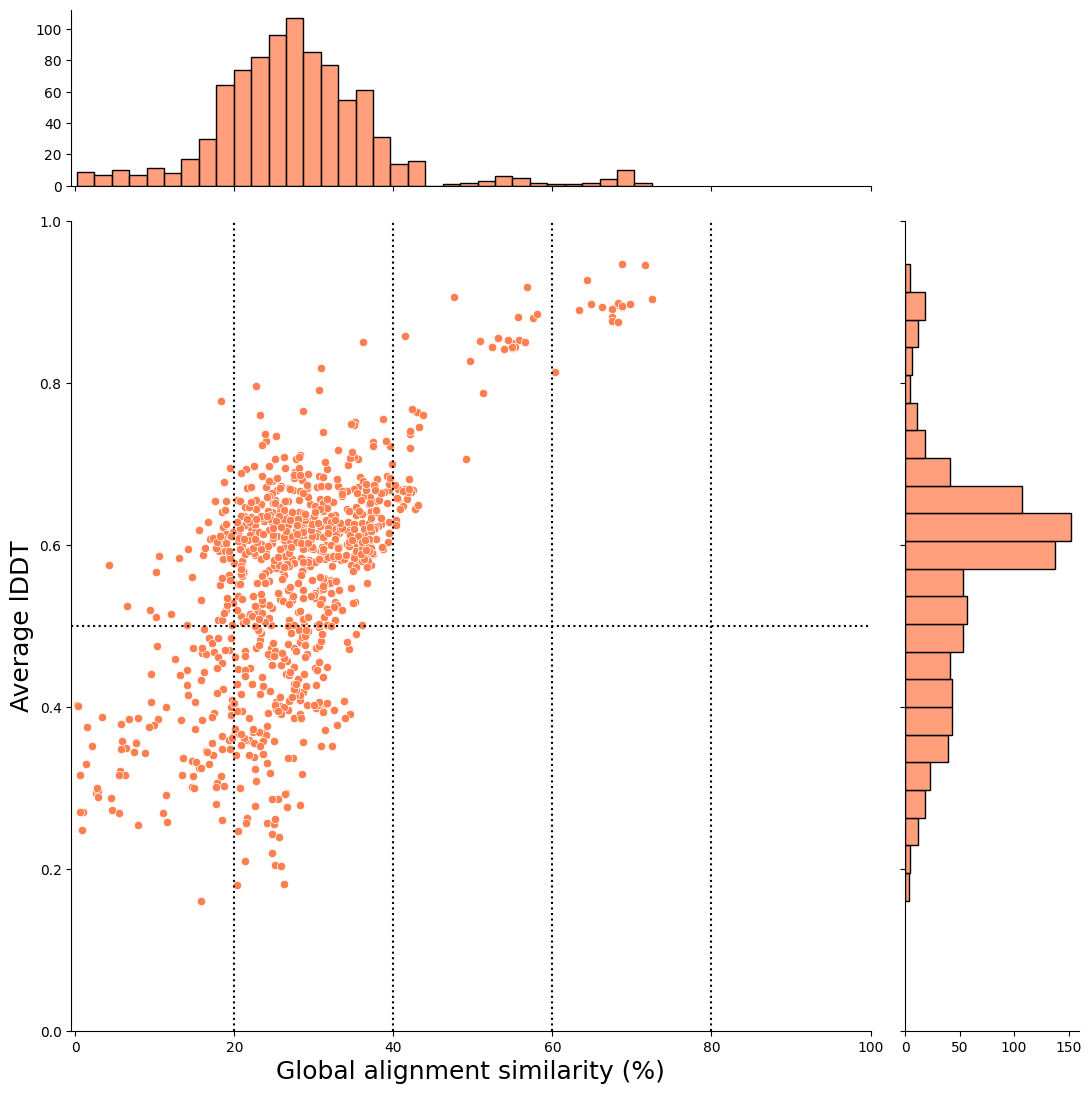

In [19]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

<Figure size 4000x4000 with 0 Axes>

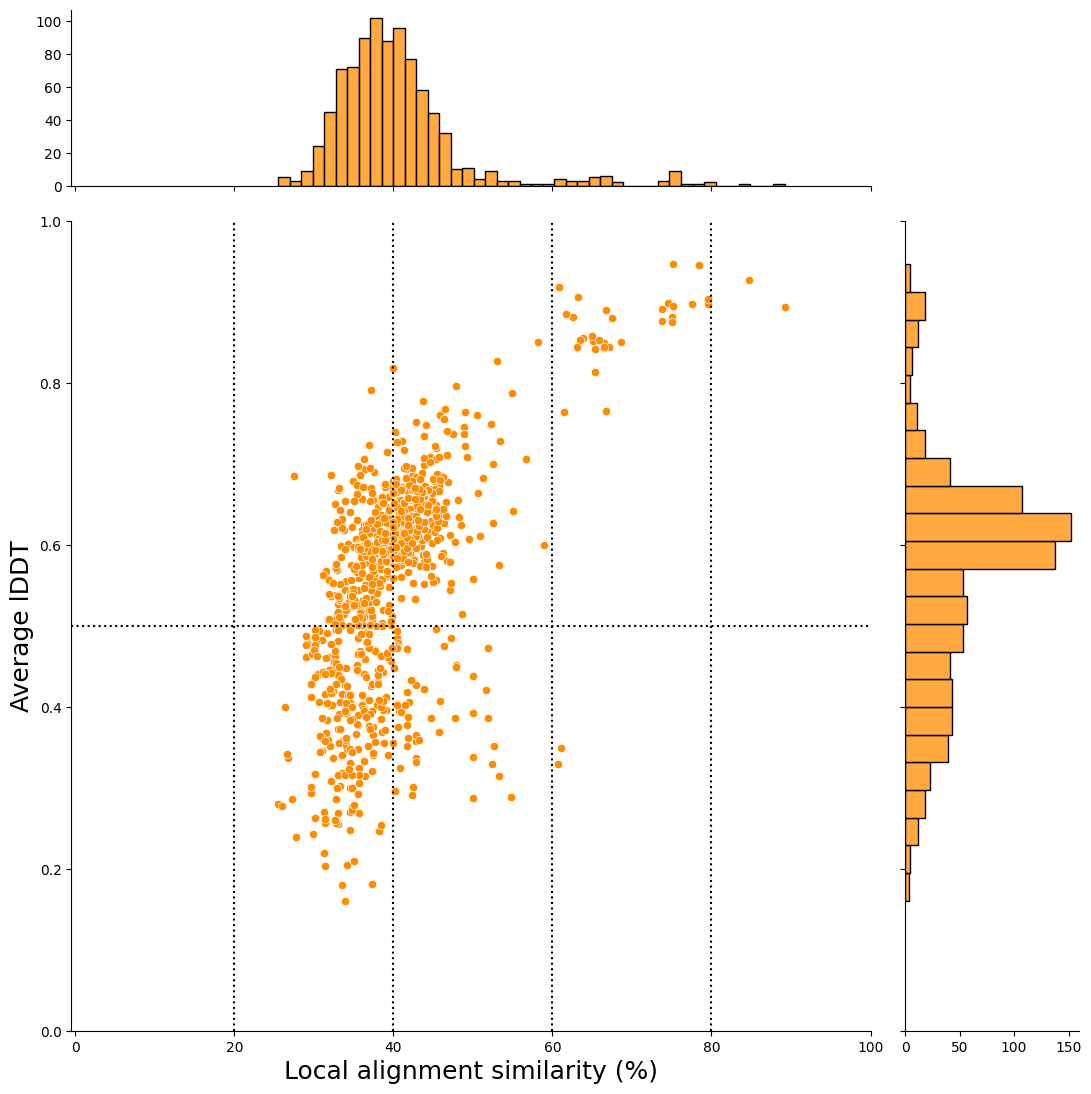

In [20]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_water",
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")

plt.axhline(y=0.5, color="black", linestyle=":")
plt.show()

&nbsp;

&nbsp;
